In [4]:
import pandas as pd
from scipy import stats
import numpy as np

import_dir = r"D:\Projects\SARS-Prediction_v2\preprocess\mut2seq\output\merged_variant_output.csv"

df = pd.read_csv(import_dir)
df = df[df["log10Ka"].notna()]

# print(df["aim_seq"].value_counts())
z = stats.zscore(df["log10Ka"])


df_clip = df[np.abs(z) < 2.5]

# df_du = df[df["aim_seq"] == "NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST"]
# print(df_du["target"].value_counts())

print(f"去除极端值后数据量: {len(df_clip)}")
print(df_clip.head())


去除极端值后数据量: 831813
  library    variant_class      target  n_aa_substitutions  TiteSeq_avgcount  \
1  pool1A  1 nonsynonymous  Wuhan_Hu_1                   1         59.823342   
2  pool1A         wildtype  Wuhan_Hu_1                   0         66.484153   
3  pool1A  1 nonsynonymous         BA1                   1         17.062794   
4  pool1A  1 nonsynonymous  Wuhan_Hu_1                   1         24.911126   
5  pool1A  1 nonsynonymous  Wuhan_Hu_1                   1         47.415298   

    log10Ka                                            aim_seq  \
1  5.963056  NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...   
2  8.913236  NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...   
3  9.253828  NITNLCPFDEVFNATRFASVYAWNRKRISNCVADYSVLYNLNPFFT...   
4  9.152625  NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...   
5  7.937769  NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...   

            barcode aa_substitutions  
1  AAAAAAAAAAAGGAGA            G166M  
2  AAAAAAAAAAATTTAA       

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'SimSun', 'KaiTi']
plt.rcParams['axes.unicode_minus'] = False

import_dir1 = r"D:\Projects\SARS-Prediction_v2\preprocess\seqsample\output\sampled_output_all.csv"
outport_dir1 = r"D:\Projects\SARS-Prediction_v2\preprocess\seqsample\output\sampled_output.csv"
# plt.figure(figsize=(8, 5))
# plt.hist(df1["diff_count"], bins=30, color='orange', edgecolor='black')
# plt.xlabel('diff_counts')
# plt.ylabel('样本数')
# plt.title('diff_counts 分布')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

df1 = pd.read_csv(import_dir1)
df1 = df1[df1["mean_log10Ka"] > 5.01]

vc = df1["diff_count"].value_counts()
mean_count = int(vc.mean())
print(f"平均每组样本数: {mean_count}")

# 大于等于平均数的组做下采样
large_counts = vc[vc >= mean_count].index.tolist()
df_large = df1[df1["diff_count"].isin(large_counts)].groupby("diff_count", group_keys=False).apply(
    lambda x: x.sample(n=mean_count, random_state=42)
)

# 小于平均数的组全部保留
small_counts = vc[vc < mean_count*2].index.tolist()
df_small = df1[df1["diff_count"].isin(small_counts)]

# 合并
df_balanced = pd.concat([df_large, df_small], axis=0)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# 保存
df_balanced.to_csv(outport_dir1, index=False)
print(f"平衡后的数据已保存到: {outport_dir1}")

平均每组样本数: 4862
平衡后的数据已保存到: D:\Projects\SARS-Prediction_v2\preprocess\seqsample\output\sampled_output.csv


C:\Users\IAdmin\AppData\Local\Temp\ipykernel_17924\1729451959.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_large = df1[df1["diff_count"].isin(large_counts)].groupby("diff_count", group_keys=False).apply(


normaltest: stat=522.2937873694667, p=3.848975144339981e-114
数据不服从正态分布


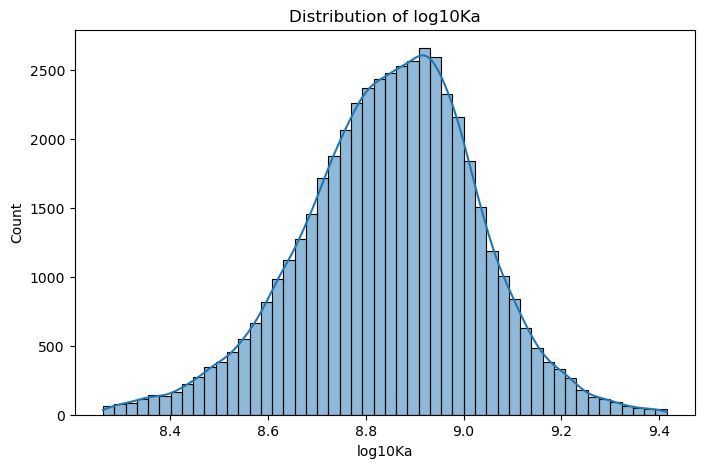

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import normaltest

# stat, p = normaltest(df_du_clip["log10Ka"].to_list())
# print(f"normaltest: stat={stat}, p={p}")
# if p > 0.05:
#     print("数据近似服从正态分布")
# else:
#     print("数据不服从正态分布")

# plt.figure(figsize=(8, 5))
# sns.histplot(df_du_clip["log10Ka"], bins=50, kde=True)
# plt.xlabel("log10Ka")
# plt.ylabel("Count")
# plt.title("Distribution of log10Ka")
# plt.show()



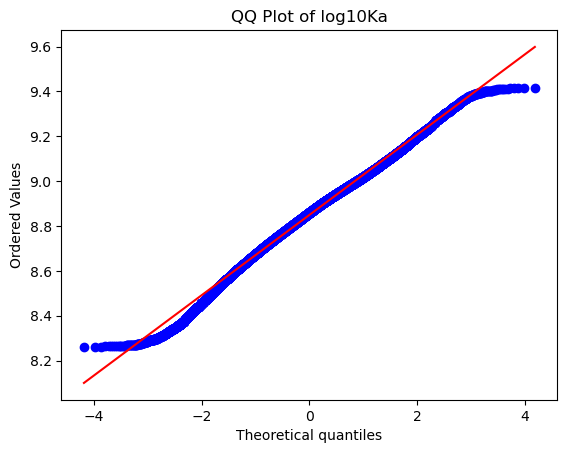

In [ ]:
# import scipy.stats as stats
# import matplotlib.pyplot as plt

# stats.probplot(df_du_clip["log10Ka"], dist="norm", plot=plt)
# plt.title("QQ Plot of log10Ka")
# plt.show()